# Exploratory Data Analysis

The main objectives for this notebook are:
- Display distributions (univariate analysis)
- Investigate the relationships between variables
- Highlight insights that show benefits for music listeners
- Go through the next steps that will be used in feature engineering and machine learning

In [103]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt

In [104]:
data = pd.read_csv('../data/Data - MHxM cleaned.csv')
data

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,4.0,0,0,0,Video game music,0,1,132.0,...,1,0,1,1,3,7.0,7.0,10.0,2.0,0
1,18.0,Spotify,4.0,1,0,0,R&B,1,0,107.0,...,2,3,3,0,1,7.0,2.0,5.0,9.0,1
2,18.0,Spotify,5.0,1,1,1,Jazz,1,1,86.0,...,3,3,3,3,0,8.0,8.0,7.0,7.0,1
3,18.0,YouTube Music,3.0,1,1,0,Video game music,1,1,66.0,...,1,1,0,0,2,4.0,8.0,6.0,0.0,1
4,21.0,Spotify,1.0,1,0,0,K pop,1,1,95.0,...,2,2,1,0,1,5.0,3.0,5.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,17.0,Spotify,2.0,1,1,0,Rock,1,1,120.0,...,3,0,1,3,0,7.0,6.0,0.0,9.0,1
678,18.0,Spotify,1.0,1,1,0,Pop,1,1,160.0,...,3,0,0,2,2,3.0,2.0,2.0,5.0,1
679,19.0,Other streaming service,6.0,1,0,1,Rap,1,0,120.0,...,2,2,2,1,1,2.0,2.0,2.0,2.0,1
680,19.0,Spotify,5.0,1,1,0,Classical,0,0,170.0,...,0,0,0,0,2,2.0,3.0,2.0,1.0,1


In [105]:
data.shape

(682, 31)

In [127]:
# data.info()

In [141]:
# Predefine figsize
figsize1_1 = (6, 3)
figsize1_2 = (16, 4)

Text(0.5, 1.0, 'BPM of music')

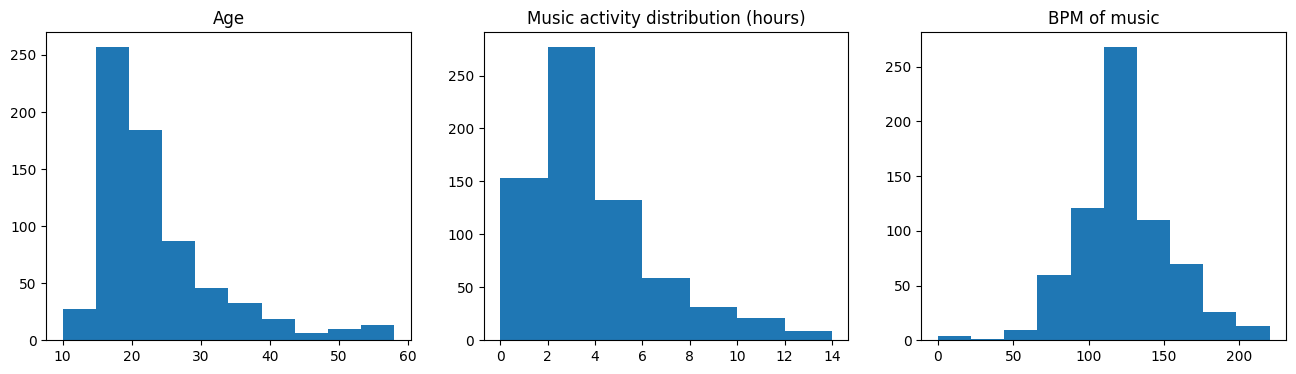

In [145]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3,figsize=figsize1_2)

ax0.hist(data['Age'])
ax0.set_title('Age')

ax1.hist(data['Hours per day'], bins=7)
ax1.set_title('Music activity distribution (hours)')

ax2.hist(data['BPM'])
ax2.set_title('BPM of music')


Fav genre
Rock                168
Pop                 112
Metal                87
Classical            48
Video game music     42
Hip hop              34
EDM                  33
R&B                  33
Folk                 29
Country              23
K pop                21
Rap                  20
Jazz                 18
Lofi                 10
Gospel                2
Latin                 2
dtype: int64


Text(0.5, 1.0, 'Favorite genres')

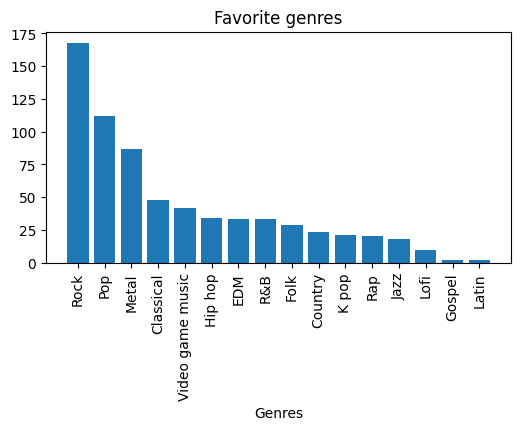

In [115]:
data_by_fave = data.groupby('Fav genre').size().sort_values(ascending=False)
print(data_by_fave)

fig2, ax0 = plt.subplots(figsize=figsize1_1)
ax0.bar(data_by_fave.index, data_by_fave)

ax0.set_xlabel('Genres')
ax0.tick_params('x', rotation=90)
ax0.set_title('Favorite genres')

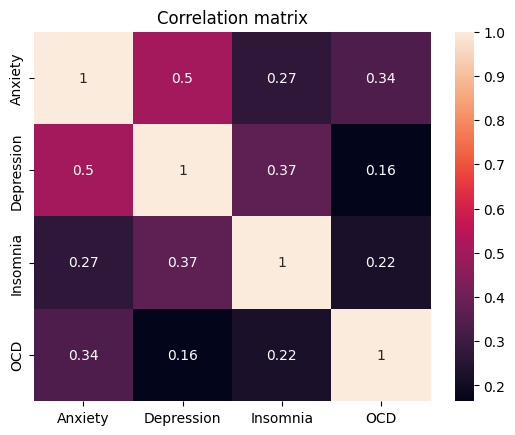

In [122]:
mental_health_list = list(data.columns[26:30])
correl_data = data[mental_health_list]
correl_matrix = correl_data.corr()

fig3, ax0 = plt.subplots()

sns.heatmap(correl_matrix, annot=True)
plt.title('Correlation matrix')
plt.show()

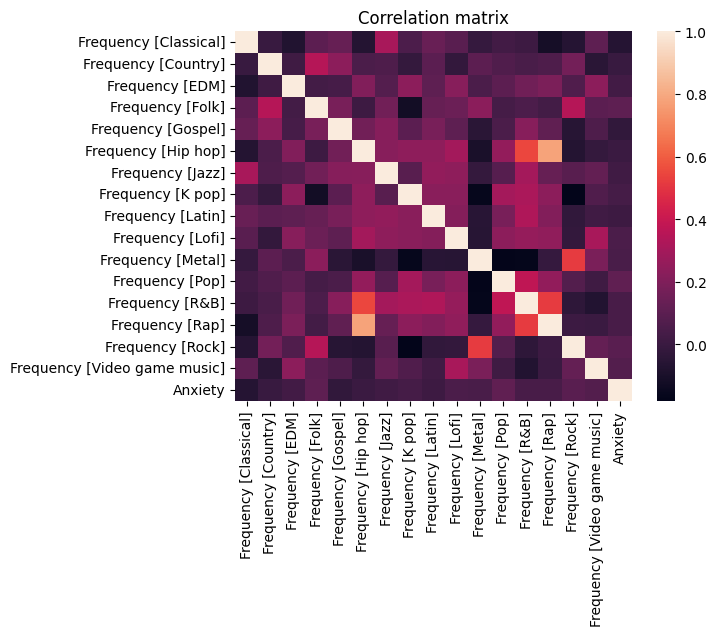

In [124]:
mental_health_list = list(data.columns[10:27])
correl_data = data[mental_health_list]
correl_matrix = correl_data.corr()

fig3, ax0 = plt.subplots()  

sns.heatmap(correl_matrix)
plt.title('Correlation matrix')
plt.show()